In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SOLUSDT_1h_1h-pump05_200811_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2020-08-11 06:00:00,2.8500,3.4700,2.8500,2.9515,20032.26,267.0,8525.75,26428.370652,0,...,NaN,0.740950,0.210063,0.425601,NaN,NaN,NaN,-0.148798,NaN,0.37931
1,2020-08-11 07:00:00,2.9515,3.1355,2.8800,2.9224,42069.37,472.0,15341.03,45571.929835,0,...,NaN,0.573961,0.087428,0.364660,NaN,NaN,NaN,-0.270679,NaN,0.37931
2,2020-08-11 08:00:00,2.9626,3.0000,2.9144,2.9600,24280.76,209.0,11965.57,35183.719706,0,...,NaN,0.971611,0.028919,0.492800,NaN,NaN,NaN,-0.014399,NaN,0.37931
3,2020-08-11 09:00:00,2.9600,2.9736,2.8500,2.8543,26371.23,230.0,6206.30,18224.874289,0,...,NaN,0.307777,0.043303,0.235344,NaN,NaN,NaN,-0.529313,NaN,0.37931
4,2020-08-11 10:00:00,2.8566,2.9329,2.8433,2.8976,26685.94,277.0,5229.47,15089.814623,0,...,NaN,0.243725,0.030922,0.195963,NaN,NaN,NaN,-0.608073,NaN,0.37931


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SOLUSDT"
start_date = "2020-08-11"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close      volume  num_trades  \
 0        2.8500    3.4700    2.8500    2.9515   20032.260       267.0   
 1        2.9515    3.1355    2.8800    2.9224   42069.370       472.0   
 2        2.9626    3.0000    2.9144    2.9600   24280.760       209.0   
 3        2.9600    2.9736    2.8500    2.8543   26371.230       230.0   
 4        2.8566    2.9329    2.8433    2.8976   26685.940       277.0   
 ...         ...       ...       ...       ...         ...         ...   
 39185  241.0900  241.3800  238.7200  241.1300  191797.531     91376.0   
 39186  241.1400  241.2300  238.4000  238.6300  127350.266     94948.0   
 39187  238.6300  240.6400  238.6200  240.5100   58979.626     60817.0   
 39188  240.5100  242.2000  239.4300  239.9700  136787.030     51852.0   
 39189  239.9600  240.8100  238.3000  238.3100   55398.093     59192.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0            8525.750     2.642837e

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.9485


np.float64(0.9484987503289704)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.9485
AUC-ROC Score: 0.9476

Overall Metrics:
Accuracy:  0.7379
Precision: 0.8469
Recall:    0.7379
F1-Score:  0.7416

Class 0 Metrics:
Precision: 0.5681
Recall:    0.9919
F1-Score:  0.7225

Class 1 Metrics:
Precision: 0.9931
Recall:    0.6047
F1-Score:  0.7516

Using raw probabilities
Classification threshold: 0.9485
{'accuracy': 0.7378640776699029, 'precision': 0.8468950786141194, 'recall': 0.7378640776699029, 'f1': 0.7416071350992508, 'auc_roc': np.float64(0.9476403191707018), 'optimal_threshold': np.float64(0.9484987503289704), 'precision_0': 0.5681293302540416, 'recall_0': 0.9919354838709677, 'f1_0': 0.7224669603524229, 'precision_1': 0.9930555555555556, 'recall_1': 0.6046511627906976, 'f1_1': 0.7516425755584757}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


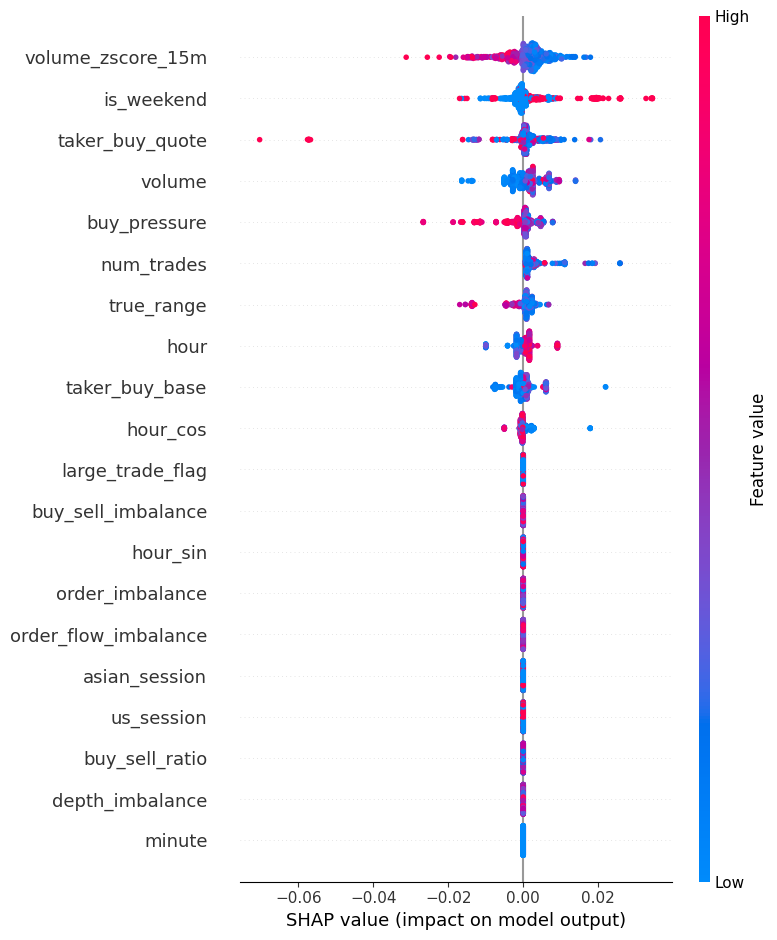


📈 Calculating feature importance...


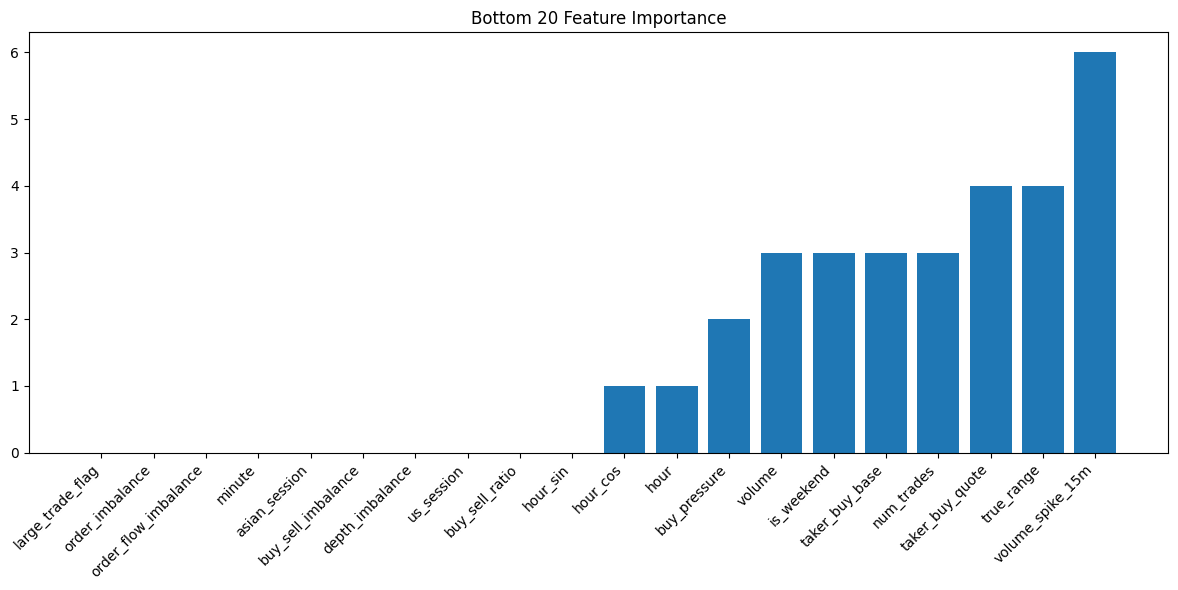

Found existing experiment
Identical result already exists for experiment ID: 27
Logged feature importance for experiment ID: 27


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()